# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('car_data.csv')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.shape

(804, 12)

In [5]:
df.Trim.unique()

array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [6]:
df.Doors.unique()

array([4, 2], dtype=int64)

In [7]:
df.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [8]:
df.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [9]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [11]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [12]:
df.describe()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


## Task 1 Solution

In [13]:
X=df[['Mileage']]
y=df[['Price']]

Finding Outliers

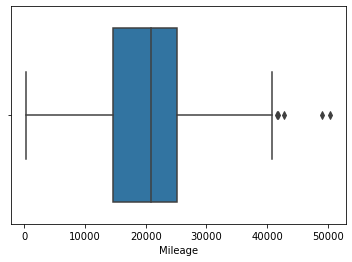

In [14]:
sns.boxplot(df['Mileage'])
plt.show()

In [15]:
q25=df['Mileage'].quantile(0.25)
q75=df['Mileage'].quantile(0.75)

In [16]:
q25,q75

(14623.5, 25213.0)

In [17]:
iqr=q75-q25
print(iqr)

10589.5


In [18]:
max=q75+(1.5*iqr)
max

41097.25

In [19]:
min=q25-(1.5*iqr)
min

-1260.75

In [20]:
new_df=df[(df['Mileage'] > min) & (df['Mileage']< max)]

<AxesSubplot:xlabel='Mileage'>

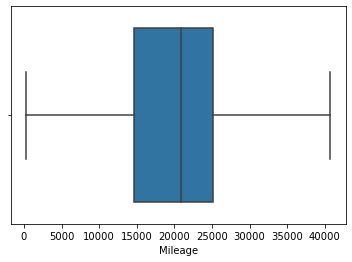

In [21]:
sns.boxplot(new_df['Mileage'])

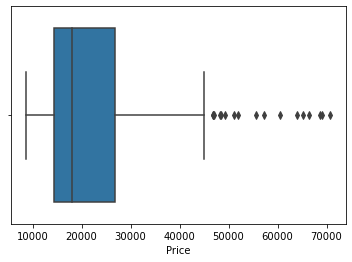

In [22]:
sns.boxplot(df['Price'])
plt.show()

In [23]:
q25=df['Price'].quantile(0.25)
q75=df['Price'].quantile(0.75)

In [24]:
iqr=q75-q25

In [25]:
max1=q75+(1.5*iqr)
max1

45383.68078365926

In [26]:
min1=q25-(1.5*iqr)
min1

-4393.290277667038

In [27]:
new_df=df[(df['Price'] > min1) & (df['Price']< max1)]
new_df.count()

Price       787
Mileage     787
Make        787
Model       787
Trim        787
Type        787
Cylinder    787
Liter       787
Doors       787
Cruise      787
Sound       787
Leather     787
dtype: int64

In [28]:
q25=new_df['Price'].quantile(0.25)
q75=new_df['Price'].quantile(0.75)

In [29]:
iqr1=q75-q25

In [30]:
max2=q75+(1.5*iqr1)
max2

42693.0735229796

In [31]:
min2=q25-(1.5*iqr1)
min2

-2877.4358190536004

In [32]:
new_df=df[(df['Price'] > min2) & (df['Price']< max2)]
new_df.count()

Price       776
Mileage     776
Make        776
Model       776
Trim        776
Type        776
Cylinder    776
Liter       776
Doors       776
Cruise      776
Sound       776
Leather     776
dtype: int64

<AxesSubplot:xlabel='Price'>

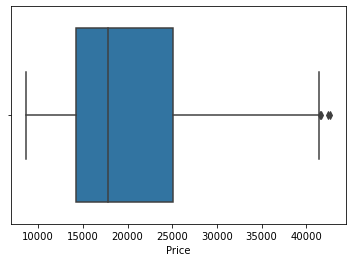

In [33]:
sns.boxplot(new_df['Price'])

In [34]:
new_df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.087212
Price,-0.087212,1.000000


There is low correlation between Mileage and Price. Hence transformation is required.

In [35]:
new_df['Price1']=np.log(new_df['Price'])

In [36]:
new_df[['Mileage','Price1']].corr()

,Mileage,Price1
Mileage,1.000000,-0.105928
Price1,-0.105928,1.000000


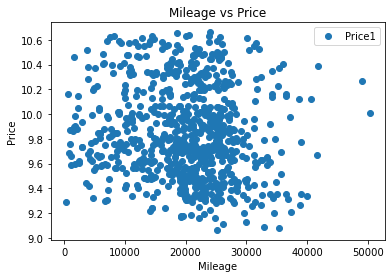

In [37]:
new_df.plot(x='Mileage', y='Price1', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [38]:
X=new_df[['Mileage']]
y=new_df[['Price1']]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(543, 1) (233, 1) (543, 1) (233, 1)


In [41]:
model=LinearRegression()

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred=model.predict(X_test)

In [44]:
model.intercept_

array([9.93858271])

In [45]:
model.coef_

array([[-4.70382717e-06]])

In [46]:
r2_score(y_test,y_pred)

0.013442071092171548

Equation is not a good fit

### Find the linear regression equation for mileage vs price.

y=4.70382717e-06*x+9.93858271

### Chart the original data and the equation on the chart.

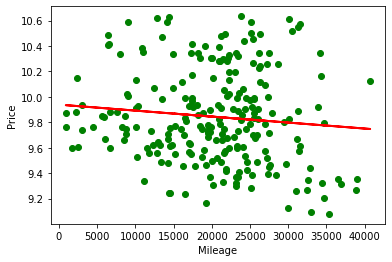

In [47]:
plt.scatter(X_test,y_test,marker='o',color='green')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

### Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [48]:
r2_score(y_test,y_pred)

0.013442071092171548

Equation is not a good fit.

## Task 2 Solution

### Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [49]:
data=new_df.drop(["Make","Model","Trim","Type","Price1"],axis=1)

In [50]:
data.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1


In [51]:
data.shape

(776, 8)

In [52]:
data.dtypes

Price       float64
Mileage       int64
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [53]:
data.isna().apply(pd.value_counts).T

,False
Price,776
Mileage,776
Cylinder,776
Liter,776
Doors,776
Cruise,776
Sound,776
Leather,776


In [54]:
X=data.drop(["Price"],axis=1)

In [55]:
y=data[["Price"]]

In [56]:
X.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1


In [57]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [58]:
corr=data.corr()

In [59]:
corr[['Price']]

,Price
Price,1.000000
Mileage,-0.087212
Cylinder,0.481151
Liter,0.491439
Doors,-0.057723
Cruise,0.466330
Sound,-0.168841
Leather,0.112633


In [60]:
data.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20245.800425,20028.020619,5.172680,2.963660,3.546392,0.743557,0.680412,0.713918
std,7969.156796,8035.016919,1.313386,1.046342,0.838070,0.436951,0.466618,0.452220
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14194.088272,14945.500000,4.000000,2.200000,4.000000,0.000000,0.000000,0.000000
50%,17770.514593,21047.500000,4.000000,2.300000,4.000000,1.000000,1.000000,1.000000
75%,25097.762201,25245.500000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,42677.601117,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


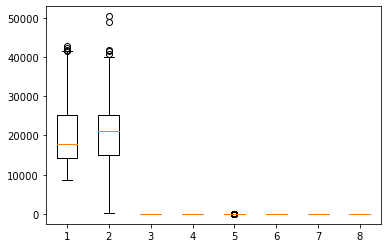

In [61]:
plt.boxplot(data)
plt.show()

In [62]:
q25=data['Mileage'].quantile(0.25)
q75=data['Mileage'].quantile(0.75)

In [63]:
q25,q75

(14945.5, 25245.5)

In [64]:
iqr=q75-q25
print(iqr)

10300.0


In [65]:
max=q75+(1.5*iqr)
max

40695.5

In [66]:
min=q25-(1.5*iqr)
min

-504.5

In [67]:
data=data[(data['Mileage'] > min) & (data['Mileage']< max)]

<AxesSubplot:xlabel='Mileage'>

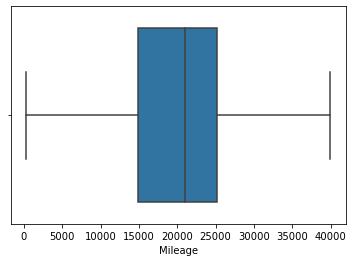

In [68]:
sns.boxplot(data['Mileage'])

In [69]:
q2=data['Price'].quantile(0.25)
q7=data['Price'].quantile(0.75)

In [70]:
iqr1=q7-q2


In [71]:
max2=q7+(1.5*iqr1)
max2

41229.26441501448

In [72]:
min2=q2-(1.5*iqr)
min2

-1261.5480849491505

In [73]:
data=data[(data['Price'] > min2) & (data['Price']< max2)]

<AxesSubplot:xlabel='Price'>

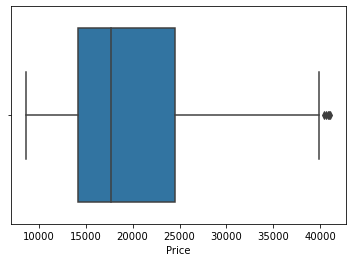

In [74]:
sns.boxplot(data['Price'])

<AxesSubplot:xlabel='Doors'>

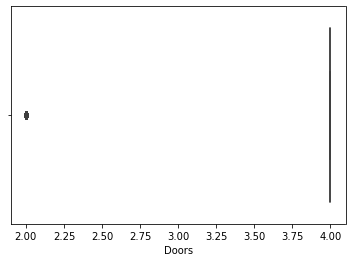

In [75]:
sns.boxplot(data['Doors'])

<AxesSubplot:xlabel='Doors', ylabel='count'>

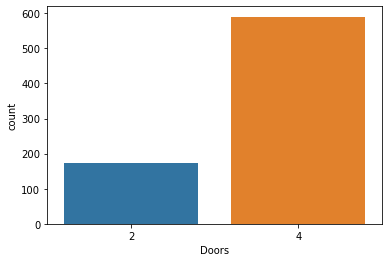

In [76]:
sns.countplot(data.Doors)

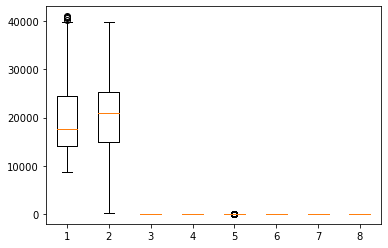

In [77]:
plt.boxplot(data)
plt.show()

In [78]:
corr=data.corr()
corr[['Price']]

,Price
Price,1.000000
Mileage,-0.102035
Cylinder,0.454658
Liter,0.470642
Doors,-0.064307
Cruise,0.468002
Sound,-0.149363
Leather,0.098482


In [79]:
### Transformation

In [80]:
data['Mileage']=(data['Mileage']*data['Mileage']*data['Mileage'])

In [81]:
data[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.111285
Price,-0.111285,1.000000


There is low correlation between transformed feature and the target.

In [82]:
data[['Cylinder','Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.454658
Price,0.454658,1.000000


1) There is a linear relationship between Cylinder and Price

2) As number of Cylinders increases, Price increases 

3) No transformation required


In [83]:
data[['Liter','Price']].corr()

,Liter,Price
Liter,1.000000,0.470642
Price,0.470642,1.000000


1) There is a linear relationship between Liter and Price

2) No transformation required

In [84]:
data[['Doors','Price']].corr()

,Doors,Price
Doors,1.000000,-0.064307
Price,-0.064307,1.000000


In [85]:
data[['Leather','Price']].corr()

,Leather,Price
Leather,1.000000,0.098482
Price,0.098482,1.000000


### Split Data

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Model Training

In [87]:
model=LinearRegression()

In [88]:
model.fit(X_train,y_train)

LinearRegression()

In [89]:
y_pred=model.predict(X_test)

In [90]:
model.coef_

array([[-1.31740578e-01,  5.45065503e+02,  1.74419703e+03,
        -6.97943324e+02,  6.66043839e+03, -2.95568611e+03,
         2.32080536e+03]])

In [98]:
X.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], dtype='object')

In [91]:
model.intercept_

array([12899.70041353])

### Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [92]:
r2_score(y_test,y_pred)

0.40743526437340005

Not a good fit

### Find the combination of the factors that is the best predictor for price.


In [107]:
corr = data.corr()["Price"].sort_values(ascending=False)[1:]
abs(corr)

Liter       0.470642
Cruise      0.468002
Cylinder    0.454658
Leather     0.098482
Doors       0.064307
Mileage     0.111285
Sound       0.149363
Name: Price, dtype: float64

**Liter,Cruise and Cylinder gives best predictor for Price** 

In [105]:
model.coef_

array([[-1.31740578e-01,  5.45065503e+02,  1.74419703e+03,
        -6.97943324e+02,  6.66043839e+03, -2.95568611e+03,
         2.32080536e+03]])

In [129]:
X.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], dtype='object')

In [174]:
a=[-1.31740578e-01,  5.45065503e+02,  1.74419703e+03,
        -6.97943324e+02,  6.66043839e+03, -2.95568611e+03,
         2.32080536e+03]

In [177]:
a=np.array(a)

In [178]:
a

array([-1.31740578e-01,  5.45065503e+02,  1.74419703e+03, -6.97943324e+02,
        6.66043839e+03, -2.95568611e+03,  2.32080536e+03])

In [180]:
coeff_df = pd.DataFrame(a,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])

In [183]:
coeff_df

,Coefficient
Mileage,-0.131741
Cylinder,545.065503
Liter,1744.197030
Doors,-697.943324
Cruise,6660.438390
Sound,-2955.686110
Leather,2320.805360


## Task 3 Solution

In [190]:
df=pd.get_dummies(df,columns=["Make","Model","Type"])
df

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [193]:
df.isna().any()

Price                False
Mileage              False
Trim                 False
Cylinder             False
Liter                False
Doors                False
Cruise               False
Sound                False
Leather              False
Make_Buick           False
Make_Cadillac        False
Make_Chevrolet       False
Make_Pontiac         False
Make_SAAB            False
Make_Saturn          False
Model_9-2X AWD       False
Model_9_3            False
Model_9_3 HO         False
Model_9_5            False
Model_9_5 HO         False
Model_AVEO           False
Model_Bonneville     False
Model_CST-V          False
Model_CTS            False
Model_Cavalier       False
Model_Century        False
Model_Classic        False
Model_Cobalt         False
Model_Corvette       False
Model_Deville        False
Model_G6             False
Model_GTO            False
Model_Grand Am       False
Model_Grand Prix     False
Model_Impala         False
Model_Ion            False
Model_L Series       False
M

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              804 non-null    float64
 1   Mileage            804 non-null    int64  
 2   Trim               804 non-null    object 
 3   Cylinder           804 non-null    int64  
 4   Liter              804 non-null    float64
 5   Doors              804 non-null    int64  
 6   Cruise             804 non-null    int64  
 7   Sound              804 non-null    int64  
 8   Leather            804 non-null    int64  
 9   Make_Buick         804 non-null    uint8  
 10  Make_Cadillac      804 non-null    uint8  
 11  Make_Chevrolet     804 non-null    uint8  
 12  Make_Pontiac       804 non-null    uint8  
 13  Make_SAAB          804 non-null    uint8  
 14  Make_Saturn        804 non-null    uint8  
 15  Model_9-2X AWD     804 non-null    uint8  
 16  Model_9_3          804 non

In [198]:
corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs(corr)

Make_Cadillac        0.659297
Cylinder             0.569086
Liter                0.558146
Type_Convertible     0.508018
Model_XLR-V8         0.472538
Cruise               0.430851
Make_SAAB            0.335404
Model_Deville        0.296848
Model_Corvette       0.287994
Model_CST-V          0.269009
Model_STS-V8         0.245852
Model_9_3 HO         0.210464
Model_STS-V6         0.182122
Model_9_5            0.173001
Leather              0.157197
Model_9_3            0.124568
Model_9_5 HO         0.110616
Model_CTS            0.103515
Model_GTO            0.088464
Type_Wagon           0.045134
Model_Park Avenue    0.043206
Model_9-2X AWD       0.025896
Model_Lacrosse       0.005287
Model_Bonneville     0.008904
Make_Buick           0.017768
Model_G6             0.027338
Model_Lesabre        0.027642
Model_Impala         0.028301
Model_Monte Carlo    0.029917
Type_Sedan           0.034802
Model_L Series       0.054441
Model_Century        0.060819
Model_Grand Prix     0.068812
Model_Clas

Make_Cadillac        
Cylinder             
Liter                
Type_Convertible    